In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import samuroi
from samuroi.util.mask_generator import create_masks, manual_correction, ilastik_functions, test_data

%matplotlib inline


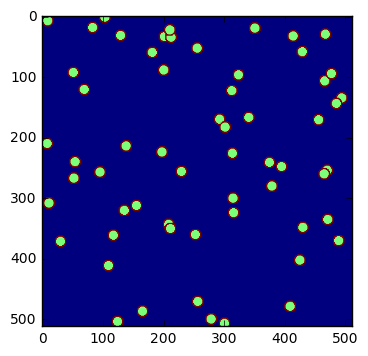

In [4]:
# test the algorithm is working using some test data
test_image = test_data.create_test_dataset((512,512), 60, 60, 40)
plt.imshow(test_image)

In [5]:
# apply segmentation and create donut ROIs
roi_mask_obj = create_masks.DonutCells(test_image, test_image==1, test_image==2)

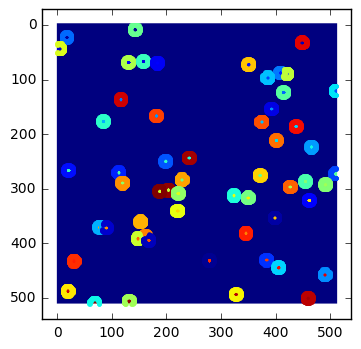

In [7]:
# plot the results
from matplotlib import cm
cmap = cm.jet_r
labelled_nuclei = roi_mask_obj.labelled_nuclei*roi_mask_obj.putative_nuclei_image
plt.imshow(labelled_nuclei) # plot the labelled cells

# set up some random colours for plotting the donut ROI masks
color_index=np.arange(0,len(roi_mask_obj.roi_masks),1)
shuffled_color_index=np.random.choice(color_index, size=len(color_index), replace=False)

# plot the masks
for m, color in zip(roi_mask_obj.roi_masks, shuffled_color_index):
    plt.scatter(m[:, 1], m[:, 0], s=5, color=cmap(color/float(len(roi_mask_obj.roi_masks))))

In [10]:
# run the manual correction gui to add or remove cells manually (this will open up a separate window)
manual_correction.ComCorrector(roi_mask_obj,test_image, roi_mask_obj.putative_somata_image,roi_mask_obj.segmentation_labels)